In [1]:
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import ipywidgets as widgets
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
rcParams['figure.figsize'] = 10, 5

In [3]:
df = pd.read_pickle('tweets.pkl')

In [4]:
df.head()

,date,id,text,target
0,2019-11-07 11:04:45,ADRS,Post MTBPS2019 and the release of the second v...,[National Treasury]
1,2019-11-07 10:25:08,MBI Matseke Business Investment (PTY)LTD,Recap of mtbps2019,None
2,2019-11-07 10:09:35,Institute for Economic Justice,Some say austerity will make things worse some...,[Budget Justice Coalition SA]
3,2019-11-07 09:13:42,Equal Education,READ State spending cuts higher taxes doing mo...,None
4,2019-11-07 06:40:01,CapeTalk on 567AM,It would be irresponsible if the Reserve Bank ...,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 4 columns):
date      2293 non-null datetime64[ns]
id        2293 non-null object
text      2293 non-null object
target    766 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 71.8+ KB


In [6]:
analyser = SentimentIntensityAnalyzer()

In [7]:
# Example showcasing VADER sentiment analysis
print(df['text'][3])
print(analyser.polarity_scores(df['text'][3]))

READ State spending cuts higher taxes doing more harm than good Parly told MTBPS2019
{'neg': 0.297, 'neu': 0.546, 'pos': 0.157, 'compound': -0.4271}


In [8]:
def sentiment_analysis(tweet):
    sentiment = analyser.polarity_scores(tweet)['compound']
    if sentiment >= 0.05:
        return 1, 'positive'
    elif (sentiment < 0.05) and (sentiment > -0.05):
        return 0, 'neutral'
    else:
        return -1, 'negative'

In [9]:
df['sentiment_score'] = df['text'].apply(lambda x: sentiment_analysis(x)[0])
df['sentiment'] = df['text'].apply(lambda x: sentiment_analysis(x)[1])

In [10]:
df.head()

,date,id,text,target,sentiment_score,sentiment
0,2019-11-07 11:04:45,ADRS,Post MTBPS2019 and the release of the second v...,[National Treasury],1,positive
1,2019-11-07 10:25:08,MBI Matseke Business Investment (PTY)LTD,Recap of mtbps2019,None,0,neutral
2,2019-11-07 10:09:35,Institute for Economic Justice,Some say austerity will make things worse some...,[Budget Justice Coalition SA],1,positive
3,2019-11-07 09:13:42,Equal Education,READ State spending cuts higher taxes doing mo...,None,-1,negative
4,2019-11-07 06:40:01,CapeTalk on 567AM,It would be irresponsible if the Reserve Bank ...,None,1,positive


In [11]:
# Separate date and time
df['Day'] = df['date'].apply(lambda x: str(x).split(' ')[0])

In [12]:
df.head()

,date,id,text,target,sentiment_score,sentiment,Day
0,2019-11-07 11:04:45,ADRS,Post MTBPS2019 and the release of the second v...,[National Treasury],1,positive,2019-11-07
1,2019-11-07 10:25:08,MBI Matseke Business Investment (PTY)LTD,Recap of mtbps2019,None,0,neutral,2019-11-07
2,2019-11-07 10:09:35,Institute for Economic Justice,Some say austerity will make things worse some...,[Budget Justice Coalition SA],1,positive,2019-11-07
3,2019-11-07 09:13:42,Equal Education,READ State spending cuts higher taxes doing mo...,None,-1,negative,2019-11-07
4,2019-11-07 06:40:01,CapeTalk on 567AM,It would be irresponsible if the Reserve Bank ...,None,1,positive,2019-11-07


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
date               2293 non-null datetime64[ns]
id                 2293 non-null object
text               2293 non-null object
target             766 non-null object
sentiment_score    2293 non-null int64
sentiment          2293 non-null object
Day                2293 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 125.5+ KB


To check the number of sentiments in each category

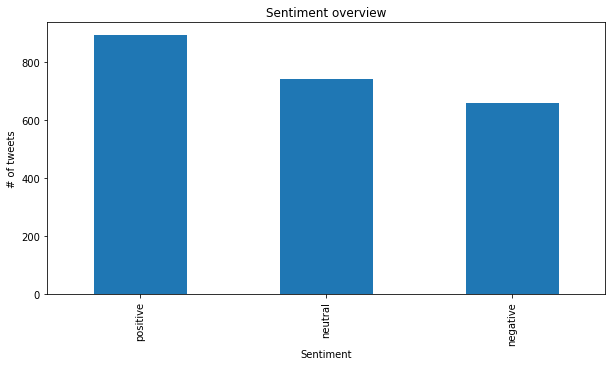

In [14]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment overview')
plt.ylabel('# of tweets')
plt.xlabel('Sentiment');

In [15]:
sns.set(style="whitegrid")

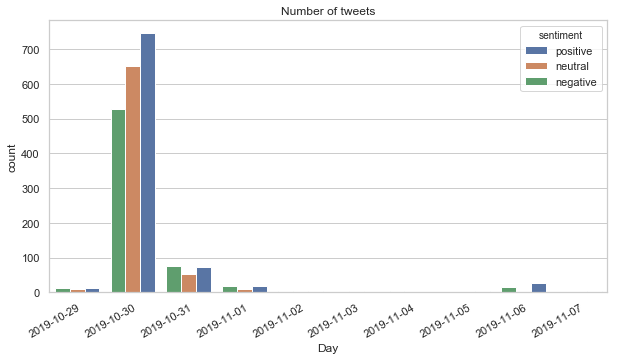

In [16]:
g = sns.countplot(x='Day', hue='sentiment', data=df)
plt.setp(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
plt.gca().invert_xaxis()
plt.title('Number of tweets');

### On the 30th of October 2019 was the day of the speech, which is why there was an increase in the number of tweets

In [17]:
# Focusing on that day
newdf = df[df['Day'] == '2019-10-30']

Sentiment distribution for the day

positive    745
neutral     652
negative    527
Name: sentiment, dtype: int64


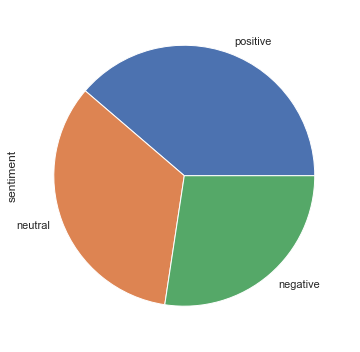

In [18]:
print(newdf['sentiment'].value_counts())
plt.figure(figsize=(6,6))
newdf['sentiment'].value_counts().plot(kind='pie');

In [19]:
# extract only the hour mark for the day
newdf['hour'] = df['date'].apply(lambda x: x.hour)

In [20]:
newdf.head()

,date,id,text,target,sentiment_score,sentiment,Day,hour
336,2019-10-30 22:40:56,voltron001,Older Lucie Villa SouthAfrica eskom MTBPS2019 ...,"[Moody's Investors Service, Moody's Analytics,...",0,neutral,2019-10-30,22
337,2019-10-30 21:21:33,Superior Invest,SA MTBPS2019 Finance Minister Tito Mboweni s f...,None,0,neutral,2019-10-30,21
338,2019-10-30 21:10:41,Sibongakonke Kheswa,Economy is a dire state Tough circumstances wi...,None,-1,negative,2019-10-30,21
339,2019-10-30 21:05:58,TTM,Im back wana help me to grow up ttm back free ...,None,1,positive,2019-10-30,21
340,2019-10-30 20:54:25,Sentient_Spirit,Why should taxpayers pay for the ANC govt fuck...,None,-1,negative,2019-10-30,20


In [21]:
# No need for the date and Day columns 
newdf.drop(['date','Day'], axis=1, inplace=True)

In [22]:
newdf.head()

,id,text,target,sentiment_score,sentiment,hour
336,voltron001,Older Lucie Villa SouthAfrica eskom MTBPS2019 ...,"[Moody's Investors Service, Moody's Analytics,...",0,neutral,22
337,Superior Invest,SA MTBPS2019 Finance Minister Tito Mboweni s f...,None,0,neutral,21
338,Sibongakonke Kheswa,Economy is a dire state Tough circumstances wi...,None,-1,negative,21
339,TTM,Im back wana help me to grow up ttm back free ...,None,1,positive,21
340,Sentient_Spirit,Why should taxpayers pay for the ANC govt fuck...,None,-1,negative,20


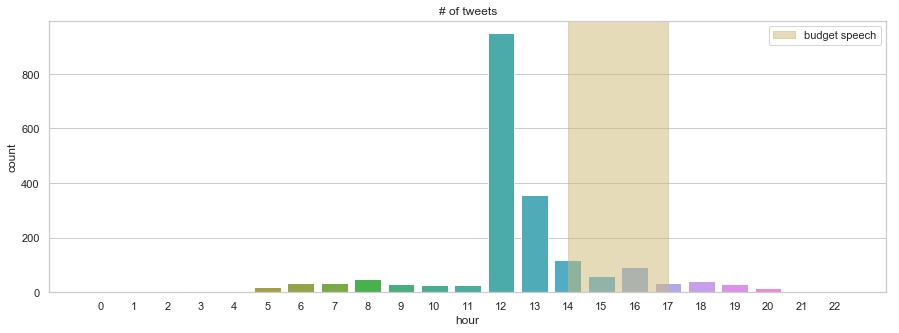

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(x='hour', data=newdf)
plt.axvspan(14, 17, color='y', alpha=0.5, label='budget speech')
plt.title('# of tweets')
plt.legend();

At midday there's a spike in the number of tweets indicative of the anticipitation of the budget speech

In [24]:
def tweet_text(start, end):
    mydf = newdf[(newdf['hour'] >= start) & (newdf['hour'] <= end)]
    continuous_tweet = str()
    for i in range(mydf.shape[0]):
        continuous_tweet += ' '.join(mydf['text'])
    return continuous_tweet

In [25]:
newdf.head(5)

,id,text,target,sentiment_score,sentiment,hour
336,voltron001,Older Lucie Villa SouthAfrica eskom MTBPS2019 ...,"[Moody's Investors Service, Moody's Analytics,...",0,neutral,22
337,Superior Invest,SA MTBPS2019 Finance Minister Tito Mboweni s f...,None,0,neutral,21
338,Sibongakonke Kheswa,Economy is a dire state Tough circumstances wi...,None,-1,negative,21
339,TTM,Im back wana help me to grow up ttm back free ...,None,1,positive,21
340,Sentient_Spirit,Why should taxpayers pay for the ANC govt fuck...,None,-1,negative,20


In [26]:
newdf['target'].iloc[0]

["Moody's Investors Service", "Moody's Analytics", "Moody's Africa"]

In [27]:
# Just testing to see if it can merge text of first four rows above since 'hour' is 21 and 22
mytext = tweet_text(21, 22)

In [28]:
mytext

'Older Lucie Villa SouthAfrica eskom MTBPS2019 MTBPS19 SA MTBPS2019 Finance Minister Tito Mboweni s full speech Economy is a dire state Tough circumstances will need tough decisions by our gvment If you overly pessimistic about the future best bet would be not having any rand investment but rather gold amp offshore NASDAQ S amp P 500 MTBPS2019 TitoMboweni Im back wana help me to grow up ttm back free today help flw Halloween instagramdown MTBPS2019Older Lucie Villa SouthAfrica eskom MTBPS2019 MTBPS19 SA MTBPS2019 Finance Minister Tito Mboweni s full speech Economy is a dire state Tough circumstances will need tough decisions by our gvment If you overly pessimistic about the future best bet would be not having any rand investment but rather gold amp offshore NASDAQ S amp P 500 MTBPS2019 TitoMboweni Im back wana help me to grow up ttm back free today help flw Halloween instagramdown MTBPS2019Older Lucie Villa SouthAfrica eskom MTBPS2019 MTBPS19 SA MTBPS2019 Finance Minister Tito Mboweni 

In [29]:
import re

In [30]:
# Need to remove variations of MTBPS2019 and Tito Mboweni (The Finance Minister) from tweets, they are the topic of all the tweets 
mystopwords = ['titomboweni','tito', 'mboweni','mtbps2019','mtbps19', 'mtbps', 'south', 'africa', 'african', 'finance', 'minister',
              'budget', 'term', 'medium', 'mid', 'speech']
for word in mystopwords:
    mytext = re.sub(word, '', mytext.lower())

In [31]:
mytext

'older lucie villa  eskom   sa      s full  economy is a dire state tough circumstances will need tough decisions by our gvment if you overly pessimistic about the future best bet would be not having any rand investment but rather gold amp offshore nasdaq s amp p 500   im back wana help me to grow up ttm back free today help flw halloween instagramdown older lucie villa  eskom   sa      s full  economy is a dire state tough circumstances will need tough decisions by our gvment if you overly pessimistic about the future best bet would be not having any rand investment but rather gold amp offshore nasdaq s amp p 500   im back wana help me to grow up ttm back free today help flw halloween instagramdown older lucie villa  eskom   sa      s full  economy is a dire state tough circumstances will need tough decisions by our gvment if you overly pessimistic about the future best bet would be not having any rand investment but rather gold amp offshore nasdaq s amp p 500   im back wana help me t

# Word Cloud for analyzing the tweets

In [32]:
from wordcloud import WordCloud, STOPWORDS

In [33]:
def create_wordcloud(tweets):
    stopwords = set(STOPWORDS)
    
    wc = WordCloud(
        background_color='white',
        max_words=50,
        stopwords=stopwords,
        width=1600,
        height=800
    )
    
    wc.generate(tweets)
    
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wc, interpolation="bilinear")

In [34]:
# Morning tweets
tweets_morning = tweet_text(0, 11)

In [35]:
for word in mystopwords:
    tweets_morning = re.sub(word, '', tweets_morning.lower())

Morning tweets WordCloud: i.e 0:00 a.m - 11:59 a.m


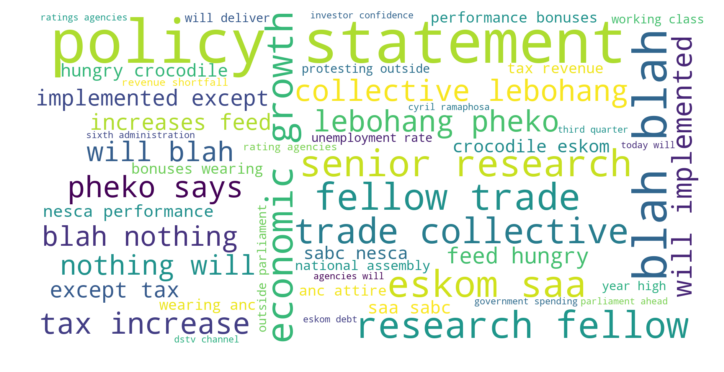

In [36]:
print('Morning tweets WordCloud: i.e 0:00 a.m - 11:59 a.m')
create_wordcloud(tweets_morning)

Lunch time tweets WordCloud: i.e 12:00 p.m - 13:59 a.m


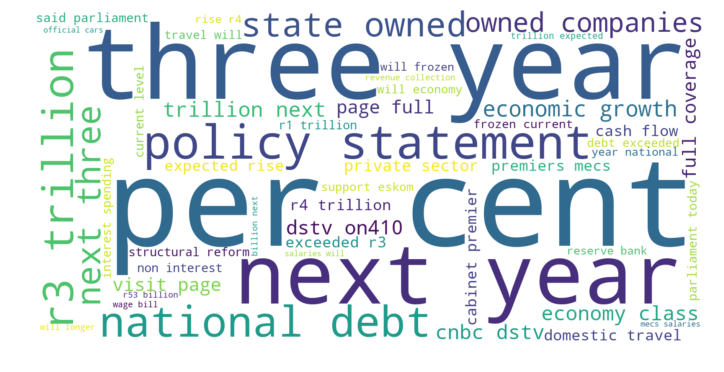

In [37]:
# Around lunchtime
tweets_lunch = tweet_text(12, 13)
for word in mystopwords:
    tweets_lunch = re.sub(word, '', tweets_lunch.lower())
print('Lunch time tweets WordCloud: i.e 12:00 p.m - 13:59 a.m')
create_wordcloud(tweets_lunch)

After lunch time tweets WordCloud: i.e from 14:00 p.m (Time of the speech)


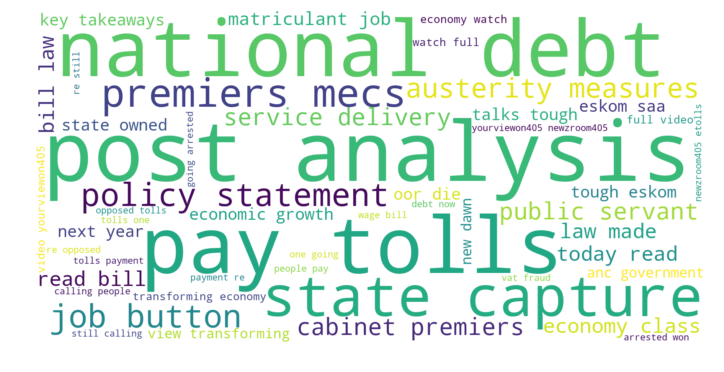

In [38]:
# After lunchtime
tweets_lunch = tweet_text(14, 23)
for word in mystopwords:
    tweets_lunch = re.sub(word, '', tweets_lunch.lower())
print('After lunch time tweets WordCloud: i.e from 14:00 p.m (Time of the speech)')
create_wordcloud(tweets_lunch)

In [39]:
# How sentiment varied throughout the day
day_sentiment = newdf.groupby('hour')['sentiment_score'].mean()

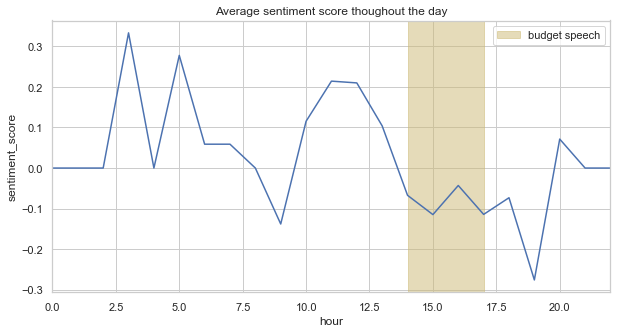

In [48]:
day_sentiment.plot(label="")
plt.axvspan(14, 17, color='y', alpha=0.5, label='budget speech')
plt.ylabel('sentiment_score')
plt.title('Average sentiment score thoughout the day')
plt.legend();

Throught the day before the speech, sentiments were fluctuating, from the period of the budget speech, more weight was towards negative sentiment, looking at the word cloud, words or phrases like "pay tolls", "national debt" were used a lot during that period.